In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt

font={'family':'serif',
      # 'style':'italic',  # 斜体
      'weight':'normal',
      # 'color':'red',
      'size': 18
}  
def setfigform_simple(xlabel, ylabel=None, xlimit = (None,None), ylimit = (None, None)):
    # plt.legend(fontsize = 16, frameon=False),
    plt.xlabel(xlabel, fontdict = font)
    plt.ylabel(ylabel, fontdict = font)
    plt.xlim(xlimit)
    plt.ylim(ylimit)
    plt.xticks(fontsize = font['size'], fontname = "serif")
    plt.yticks(fontsize = font['size'], fontname = "serif")
    plt.tick_params(direction="in")

In [9]:
def readlog(dir, trainlosskeyword="train_loss"):
    alltrainsteps_baseline = []
    alltrainlosses_baseline = []
    allvalsteps_baseline = []
    allvallosses_baseline = []
    with open(os.path.join(dir, "log.out")) as fp:
        lines = fp.readlines()
        for line in lines:
            l = line.split()
            if "..." in line: continue
            if "val_loss" in line:
                for idx_t,t in enumerate(l):
                    if "val_loss" in t:
                        allvallosses_baseline.append(float(l[idx_t+1].replace(",","")))
                    if "\'epoch\'" in t:
                        allvalsteps_baseline.append(float(l[idx_t+1].replace(",","")))
                continue
            if trainlosskeyword in line:
                for idx_t,t in enumerate(l):
                    if trainlosskeyword in t:
                        alltrainlosses_baseline.append(float(l[idx_t+1].replace(",","")))
                    if "\'epoch\'" in t:
                        alltrainsteps_baseline.append(float(l[idx_t+1].replace(",","")))

    return alltrainlosses_baseline, alltrainsteps_baseline, allvallosses_baseline, allvalsteps_baseline

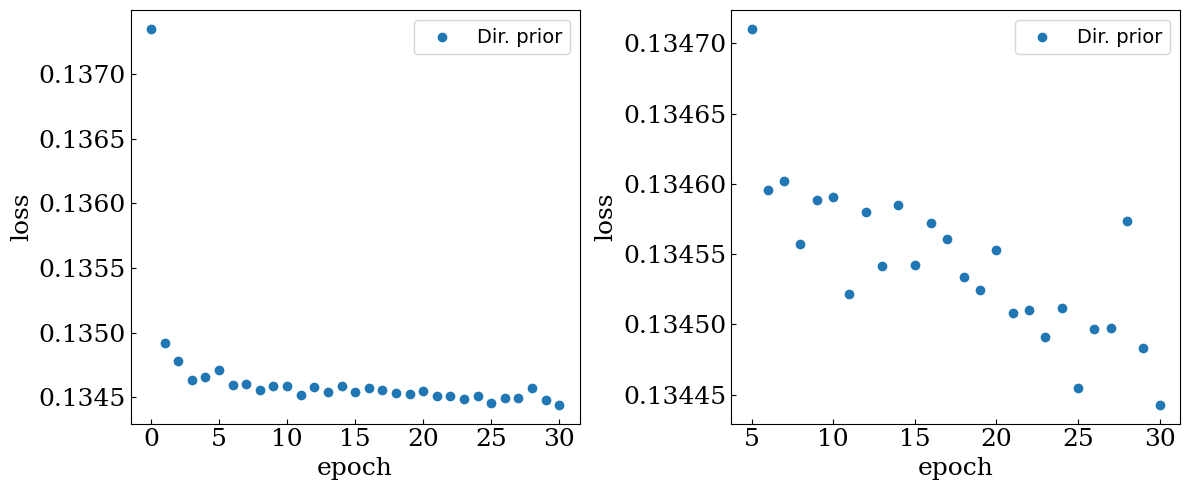

In [10]:
# dir_dir_b1024 = "logs-dir-ising/latt6x6T2.0/kernel3x3_timeembed_minusRC_reference3/"
dir_dir_b1024 = "logs-dir-ising/latt6x6/"
# dir_dir_b1024 = "logs-dir-ising/latt6x6T2.0/kernel3x3_timeembed_timescale4/"
alltrainlosses_dir_b1024, alltrainsteps_dir_b1024, allvallosses_dir_b1024, allvalsteps_dir_b1024 = readlog(dir_dir_b1024)
plt.rcParams["figure.figsize"] = (12,5)
fig = plt.figure()
plt.subplot(121)
plt.scatter(np.array(alltrainsteps_dir_b1024[:]), alltrainlosses_dir_b1024[:], label="Dir. prior")
setfigform_simple("epoch","loss")
plt.legend(fontsize=font["size"]-4)
plt.subplot(122)
plt.scatter(np.array(alltrainsteps_dir_b1024[5:]), alltrainlosses_dir_b1024[5:], label="Dir. prior")
setfigform_simple("epoch","loss")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(fontsize=font["size"]-4)
fig.tight_layout()


0.001453494999999999


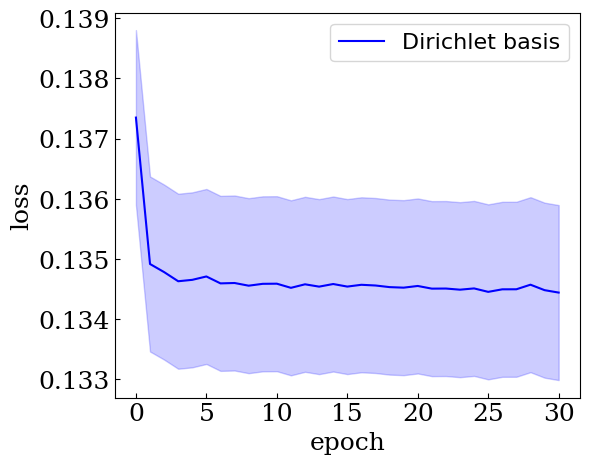

In [11]:
plt.rcParams["figure.figsize"] = (6,5)
from scipy.signal import savgol_filter

# Apply Savitzky-Golay filter
l_d_smooth = savgol_filter(alltrainlosses_dir_b1024, window_length=3, polyorder=2)
error = (np.max(alltrainlosses_dir_b1024[-50:])-np.min(alltrainlosses_dir_b1024[-50:]))/2
print(error)
# Plot the smoothed data
plt.plot(alltrainsteps_dir_b1024, l_d_smooth, label='Dirichlet basis', color='blue')

# Add error bars
plt.fill_between(alltrainsteps_dir_b1024, l_d_smooth - error, l_d_smooth + error, color='blue', alpha=0.2)

# Optionally plot the original data
# plt.scatter(alltrainsteps_dir_b1024, alltrainlosses_dir_b1024, color='gray', alpha=0.5, label='Original Data')
setfigform_simple("epoch","loss", xlimit=(None, None))
plt.legend(fontsize=font["size"]-2)

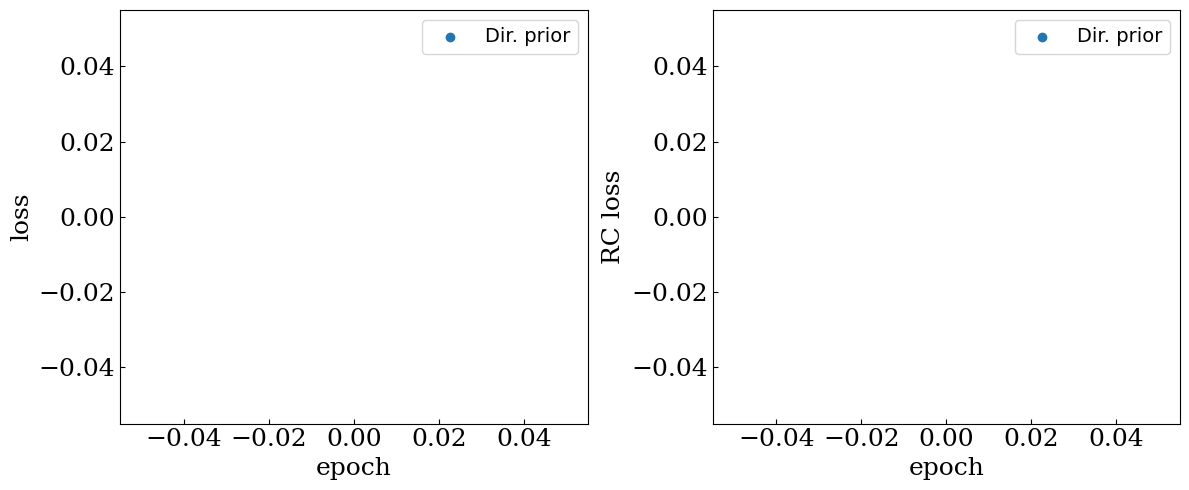

In [12]:

alltrainlosses_dir_b1024, alltrainsteps_dir_b1024, allvallosses_dir_b1024, allvalsteps_dir_b1024 = readlog(dir_dir_b1024, trainlosskeyword="train_RCLoss")
plt.rcParams["figure.figsize"] = (12,5)
fig = plt.figure()
plt.subplot(121)
plt.scatter(np.array(alltrainsteps_dir_b1024[:]), alltrainlosses_dir_b1024[:], label="Dir. prior")
setfigform_simple("epoch","loss")
plt.legend(fontsize=font["size"]-4)
plt.subplot(122)
plt.scatter(np.array(alltrainsteps_dir_b1024[10:]), alltrainlosses_dir_b1024[10:], label="Dir. prior")
setfigform_simple("epoch","RC loss")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(fontsize=font["size"]-4)
fig.tight_layout()

In [13]:
plt.rcParams["figure.figsize"] = (6,5)
from scipy.signal import savgol_filter

# Apply Savitzky-Golay filter
l_d_smooth = savgol_filter(alltrainlosses_dir_b1024[0:], window_length=3, polyorder=2)
error = (np.max(alltrainlosses_dir_b1024[-50:])-np.min(alltrainlosses_dir_b1024[-50:]))/2
print(error)
# Plot the smoothed data
plt.plot(alltrainsteps_dir_b1024[0:], l_d_smooth, label='Dirichlet basis', color='blue')

# Add error bars
plt.fill_between(alltrainsteps_dir_b1024[0:], l_d_smooth - error, l_d_smooth + error, color='blue', alpha=0.2)

# Optionally plot the original data
# plt.scatter(alltrainsteps_dir_b1024, alltrainlosses_dir_b1024, color='gray', alpha=0.5, label='Original Data')
setfigform_simple("epoch","RC loss", xlimit=(None, None))
plt.legend(fontsize=font["size"]-2)

ValueError: If mode is 'interp', window_length must be less than or equal to the size of x.

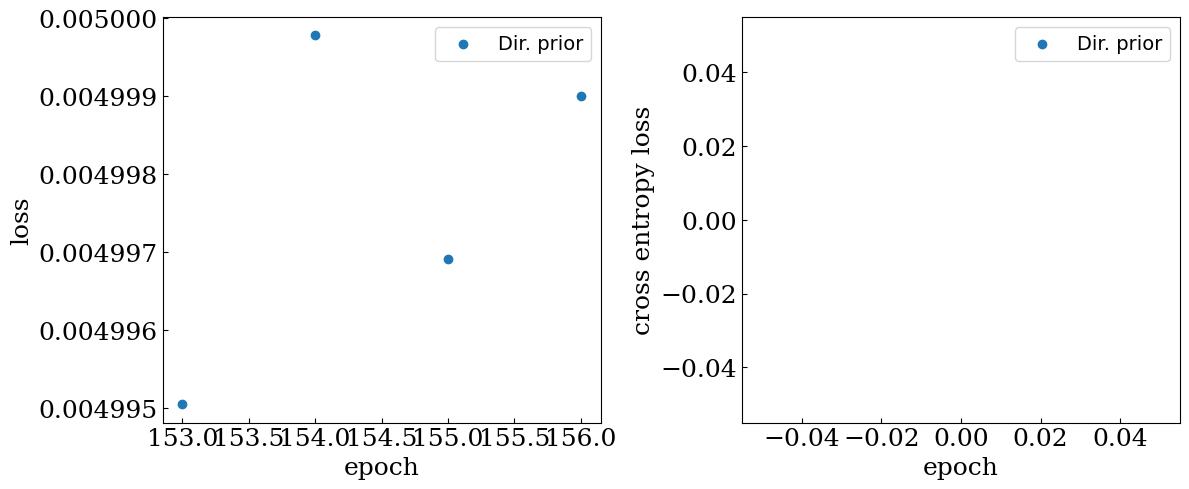

In [ ]:

alltrainlosses_dir_b1024, alltrainsteps_dir_b1024, allvallosses_dir_b1024, allvalsteps_dir_b1024 = readlog(dir_dir_b1024, trainlosskeyword="train_CELoss")
plt.rcParams["figure.figsize"] = (12,5)
fig = plt.figure()
plt.subplot(121)
plt.scatter(np.array(alltrainsteps_dir_b1024[:]), alltrainlosses_dir_b1024[:], label="Dir. prior")
setfigform_simple("epoch","loss")
plt.legend(fontsize=font["size"]-4)
plt.subplot(122)
plt.scatter(np.array(alltrainsteps_dir_b1024[10:]), alltrainlosses_dir_b1024[10:], label="Dir. prior")
setfigform_simple("epoch","cross entropy loss")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(fontsize=font["size"]-4)
fig.tight_layout()

2.3624999999998474e-06


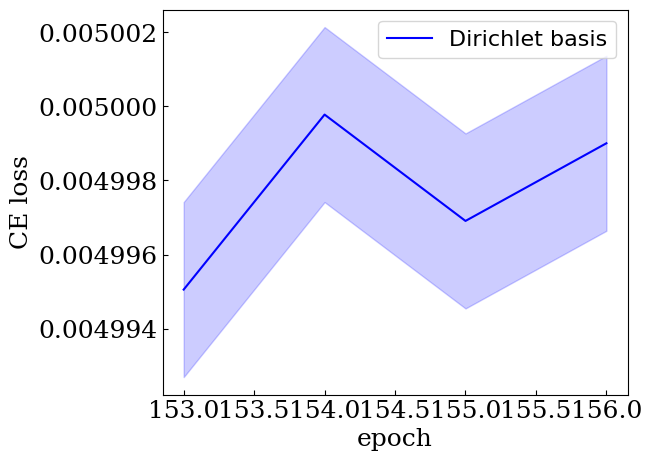

In [ ]:
plt.rcParams["figure.figsize"] = (6,5)
from scipy.signal import savgol_filter

# Apply Savitzky-Golay filter
l_d_smooth = savgol_filter(alltrainlosses_dir_b1024[0:], window_length=3, polyorder=2)
error = (np.max(alltrainlosses_dir_b1024[-50:])-np.min(alltrainlosses_dir_b1024[-50:]))/2
print(error)
# Plot the smoothed data
plt.plot(alltrainsteps_dir_b1024[0:], l_d_smooth, label='Dirichlet basis', color='blue')

# Add error bars
plt.fill_between(alltrainsteps_dir_b1024[0:], l_d_smooth - error, l_d_smooth + error, color='blue', alpha=0.2)

# Optionally plot the original data
# plt.scatter(alltrainsteps_dir_b1024, alltrainlosses_dir_b1024, color='gray', alpha=0.5, label='Original Data')
setfigform_simple("epoch","CE loss", xlimit=(None, None))
plt.legend(fontsize=font["size"]-2)